In [1]:
import pandas as pd
from transformers import AutoTokenizer
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')


tokenizer = AutoTokenizer.from_pretrained('klue/roberta-small')

raw = pd.read_csv('./data/train.csv') 
df = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

df['tok'] = df['문장'].apply(lambda x : tokenizer.tokenize(x))
df['tok_len'] = df['tok'].apply(lambda x : len(x))
test['tok'] = test['문장'].apply(lambda x : tokenizer.tokenize(x))
test['tok_len'] = test['tok'].apply(lambda x : len(x))

# 문장의 길이 -> max_input_length = 256

Train max length : 313
TeST max length : 183


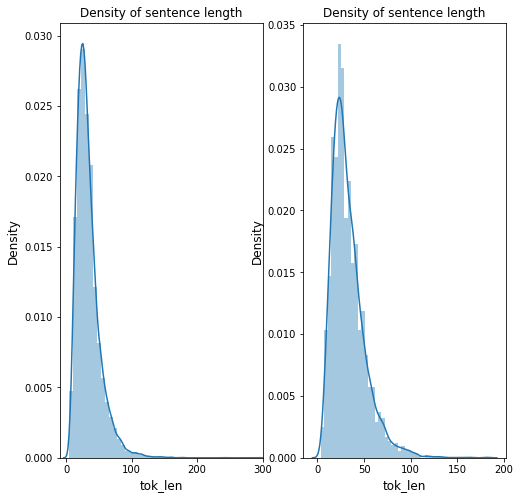

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))

g = sns.distplot(df['tok_len'], ax=axes[0])
axes[0].set_xlabel(g.get_xlabel(), fontsize=12)
axes[0].set_ylabel(g.get_ylabel(), fontsize=12) 
axes[0].set_xlim(-10, 300)
axes[0].set_title('Density of sentence length')


g = sns.distplot(test['tok_len'], ax=axes[1])
axes[1].set_xlabel(g.get_xlabel(), fontsize=12)
axes[1].set_ylabel(g.get_ylabel(), fontsize=12) 
axes[0].set_xlim(-10, 300)
axes[1].set_title('Density of sentence length')

print(f"Train max length : {max(df['tok_len'])}")
print(f"TeST max length : {max(test['tok_len'])}")

# 데이터의 형태

In [3]:
df.head(5)

,ID,문장,유형,극성,시제,확실성,label,tok,tok_len
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실,"[0, ., 75, %, 포인트, 금리, 인상, ##은, 1994, ##년, 이후,...",18
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,사실형,긍정,과거,확실,사실형-긍정-과거-확실,"[이어, ＂, 앞, ##으로, 전문가, ##들, ##과, 함께, 4, ##주, 단위...",50
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,사실형,긍정,미래,확실,사실형-긍정-미래-확실,"[정부, ##가, 고유, ##가, 대응, ##을, 위해, 7, ##월, ##부터, ...",27
3,TRAIN_00003,"서울시는 올해 3월 즉시 견인 유예시간 60분을 제공하겠다고 밝혔지만, 하루 만에 ...",사실형,긍정,과거,확실,사실형-긍정-과거-확실,"[서울시, ##는, 올해, 3, ##월, 즉시, 견인, 유예, ##시간, 60, #...",40
4,TRAIN_00004,익사한 자는 사다리에 태워 거꾸로 놓고 소금으로 코를 막아 가득 채운다.,사실형,긍정,현재,확실,사실형-긍정-현재-확실,"[익, ##사, ##한, 자는, 사다리, ##에, 태워, 거꾸로, 놓, ##고, 소...",19


In [4]:
test.head(5)

,ID,문장,tok,tok_len
0,TEST_0000,"장욱진의 ＇가족＇은 허물 없는 가족애를, 처음 공개되는 정약용의 ＇정효자전＇과 ＇정...","[장, ##욱, ##진, ##의, [UNK], 가족, [UNK], 은, 허물, 없,...",62
1,TEST_0001,"조지 W 부시, 버락 오바마 전 대통령도 전쟁 위험 때문에 버린 카드다.","[조지, W, 부시, ,, 버락, 오바마, 전, 대통령, ##도, 전쟁, 위험, 때...",17
2,TEST_0002,지난해 1분기 128억원이었던 영업이익이 올해 1분기 505억원으로 급증했다.,"[지난해, 1, ##분, ##기, 128, ##억, ##원, ##이, ##었, ##...",27
3,TEST_0003,수상 작가와 맺으려던 계약서 내용 가운데 일부가 ＇독소 조항＇으로 해석돼 수정을 요...,"[수상, 작가, ##와, 맺, ##으, ##려, ##던, 계약서, 내용, 가운데, ...",54
4,TEST_0004,결국 최근 KDB산업은행은 대규모 손실 위기에 닥친 에어부산에 140억원 금융지원을...,"[결국, 최근, KDB, ##산업, ##은행, ##은, 대, ##규모, 손실, 위기...",45


# 통계치 -> 대부분 짧다.

In [5]:
df.describe()

,tok_len
count,16541.000000
mean,33.317091
std,18.521793
min,4.000000
25%,21.000000
50%,29.000000
75%,41.000000
max,313.000000


In [6]:
test.describe()

,tok_len
count,7090.000000
mean,33.087024
std,18.105774
min,4.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,183.000000


# 결측치 -> 없음

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16541 entries, 0 to 16540
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       16541 non-null  object
 1   문장       16541 non-null  object
 2   유형       16541 non-null  object
 3   극성       16541 non-null  object
 4   시제       16541 non-null  object
 5   확실성      16541 non-null  object
 6   label    16541 non-null  object
 7   tok      16541 non-null  object
 8   tok_len  16541 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7090 entries, 0 to 7089
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       7090 non-null   object
 1   문장       7090 non-null   object
 2   tok      7090 non-null   object
 3   tok_len  7090 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 221.7+ KB


# 중복 -> 있다

- train -> 35개 * 2 중복
    - 문장은 같은데 label 이다른경우 ->
        - (14989,07269) -> 14989 삭제
        - (00208,03364) -> 03364 삭제
        - (07099,04670) -> 07099 삭제
        - (2108,15167)  -> 02108 삭제
    - 문장,label 같은 경우 -> keep = 'first'
- test - > 11개 * 2 중복
    - label이 없고, 지울수도 없음 그냥 냅둬야함  

### 코드
- pd.set_option('display.max_rows', 100)
- test[test[['문장']].duplicated(keep=False)].sort_values('문장')

## 바꾸기
- df = df.loc[df.ID != 'TRAIN_14989']
- df = df.loc[df.ID != 'TRAIN_03364']
- df = df.loc[df.ID != 'TRAIN_07099']
- df = df.loc[df.ID != 'TRAIN_02108']
- df = df.drop_duplicates('문장', keep = 'first')
        

# 라벨 시각화 -> 불균형이 굉장히 심하다
- 한글 폰트 해결이 안되니 변경..
- 4 * 3 * 3 * 2 = 72개지만, 실제로는 64개의 라벨

In [9]:
label_df = pd.read_csv('./data/train.csv')
label_df.columns = ['ID', 'sentence', 'type', 'polarity','tense', 'certainty' , 'label']
type_dict = {"사실형" : "Tr", "추론형" : "Guess", "대화형" : "Talk", "예측형" : "Predict"}
polarity_dict = {"긍정" : "Pos", "부정" : "Neg" , "미정" : "No"}
tense_dict = {"과거" : "Past", "현재" : "present", "미래" : "Future"}
certainty_dict = {"확실" : "Sure", "불확실" : "nosure"}

label_df['type'] = label_df['type'].apply(lambda x : type_dict[x])
label_df['polarity'] = label_df['polarity'].apply(lambda x : polarity_dict[x])
label_df['tense'] = label_df['tense'].apply(lambda x : tense_dict[x])
label_df['certainty'] = label_df['certainty'].apply(lambda x : certainty_dict[x])

def make_label(type,polarity,tense,certainty):
    return f"{type}-{polarity}-{tense}-{certainty}"

label_df['label_eng'] = label_df.apply(lambda x : make_label(x['type'],x['polarity'],x['tense'],x['certainty']), axis =1 , result_type = 'expand')

,ID,sentence,type,polarity,tense,certainty,label,label_eng
0,TRAIN_00000,0.75%포인트 금리 인상은 1994년 이후 28년 만에 처음이다.,Tr,Pos,present,Sure,사실형-긍정-현재-확실,Tr-Pos-present-Sure
1,TRAIN_00001,이어 ＂앞으로 전문가들과 함께 4주 단위로 상황을 재평가할 예정＂이라며 ＂그 이전이...,Tr,Pos,Past,Sure,사실형-긍정-과거-확실,Tr-Pos-Past-Sure
2,TRAIN_00002,정부가 고유가 대응을 위해 7월부터 연말까지 유류세 인하 폭을 30%에서 37%까지...,Tr,Pos,Future,Sure,사실형-긍정-미래-확실,Tr-Pos-Future-Sure


Text(0.5, 1.0, 'Distribution of certainty')

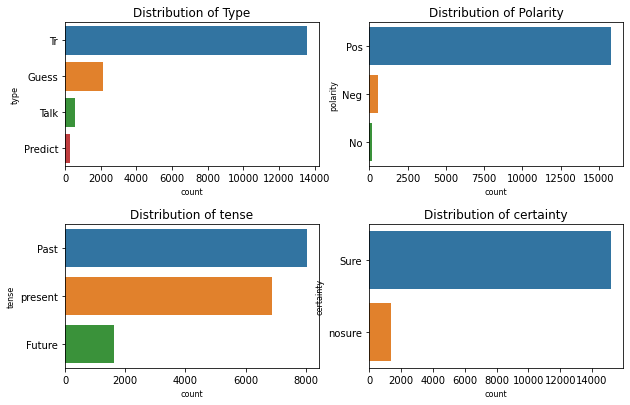

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.4)

g = sns.countplot(y="type", data=label_df,order = label_df['type'].value_counts().index , ax = axes[0][0])
axes[0][0].set_xlabel(g.get_xlabel(), fontsize=8)
axes[0][0].set_ylabel(g.get_ylabel(), fontsize=8) 
axes[0][0].set_title('Distribution of Type')

g = sns.countplot(y="polarity", data=label_df,order = label_df['polarity'].value_counts().index , ax = axes[0][1])
axes[0][1].set_xlabel(g.get_xlabel(), fontsize=8)
axes[0][1].set_ylabel(g.get_ylabel(), fontsize=8) 
axes[0][1].set_title('Distribution of Polarity')

g = sns.countplot(y="tense", data=label_df,order = label_df['tense'].value_counts().index , ax = axes[1][0])
axes[1][0].set_xlabel(g.get_xlabel(), fontsize=8)
axes[1][0].set_ylabel(g.get_ylabel(), fontsize=8) 
axes[1][0].set_title('Distribution of tense')

g = sns.countplot(y="certainty", data=label_df,order = label_df['certainty'].value_counts().index , ax = axes[1][1])
axes[1][1].set_xlabel(g.get_xlabel(), fontsize=8)
axes[1][1].set_ylabel(g.get_ylabel(), fontsize=8) 
axes[1][1].set_title('Distribution of certainty')



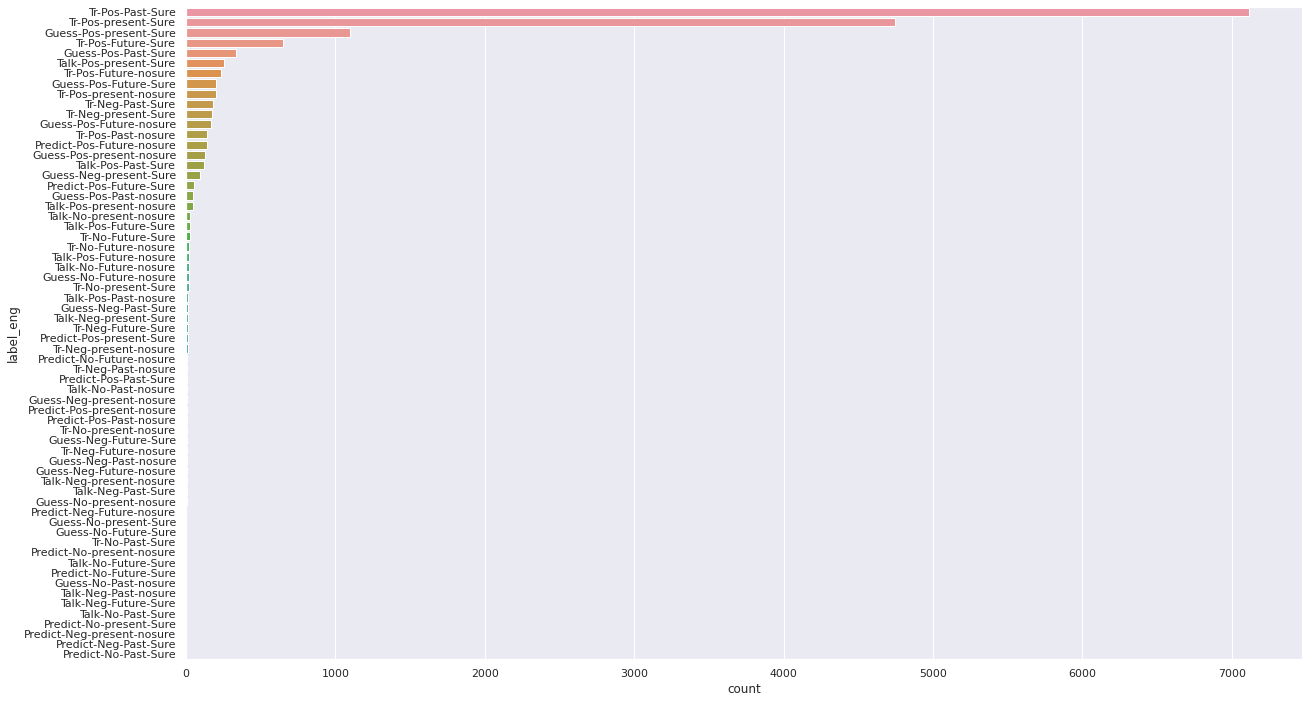

In [11]:
sns.set(rc = {'figure.figsize':(20,12)})
sns.countplot(y="label_eng", data=label_df,order = label_df['label_eng'].value_counts().index)

In [13]:
label_df['label_eng'].value_counts()


Tr-Pos-Past-Sure              7113
Tr-Pos-present-Sure           4743
Guess-Pos-present-Sure        1101
Tr-Pos-Future-Sure             649
Guess-Pos-Past-Sure            335
                              ... 
Talk-No-Past-Sure                1
Predict-No-present-Sure          1
Predict-Neg-present-nosure       1
Predict-Neg-Past-Sure            1
Predict-No-Past-Sure             1
Name: label_eng, Length: 64, dtype: int64

# 문장 살펴보기
- 문장 하나하나 구글링해보면, 뉴스 기사의 일부임을 알 수 있음
- 뉴스기사다 보니, 맞춤법 관련한 py-hanspell, py-kospacing은 필요없을수도

In [21]:
for i in range(30,len(list(label_df['sentence']))):
    print(list(label_df['sentence'])[i])
    if i == 40:
        break

특히 아마타후불화는 더욱 돋보인다.
특별히 퇴계 이황, 회재 이언적, 한강 정구, 일두 정여창을 배출했던 경상도가 차별받았다고 《택리지》는 주장한다.
팔각정은 관광도로로 유명한 ＇북악 스카이웨이＇로 인근에 있어 이륜차 운전자들이 즐겨 찾는 장소로 꼽힌다.
상업영화 데뷔작 ＇플란다스의 개＇(2000)로는 흥행하지 못했지만 거물 제작자 차승재에게 강한 인상을 남기는 데 성공했다.
이번 폐간에는 유튜브, 페이스북 등 모바일 디지털 플랫폼의 부상이 크게 작용했다.
영화는 중국 선양에서 일명 ＇야차＇가 이끄는 국정원 비밀공작 전담 블랙팀과 각국 정보부 요원들의 접전을 그린 첩보 액션물이다.
문체부 측은 사교육업체 강사를 홍보 영상에 출연시킨 이유에 대해 ＂기자단 선발 일을 함께 하는 업체에서 주예지 강사가 유튜브에서 많은 조회 수를 기록한 인물이라고 추천해 홍보영상을 찍게 됐다＂고 설명했다.
국방과학연구소와 함께 한화시스템이 국내기술로 개발해 시제1호기에 탑재된 차세대 전투기의 눈으로 불리는 AESA 레이더는 2015년 미국이 AESA 기술이전을 거부한 이후 우리 정부와 방위산업체가 국내 개발을 추진해 보기 좋게 국산화를 이룬 KF-21의 핵심장비이다.
단일 단지로는 역대 최대 규모다.
사람 친구는 어느 한쪽에 애인이 생기면 끊어주는 게 쌈빡한 예의 아닐까.
멘디니는 프랭크 게리(1928~)와 동대문 디자인플라자(DDP)를 설계한 자하 하디드(1950~2016)가 명성을 날리기 전에 커버 인물로 소개했다.
